# Applied Data Science Capstone

## Building an interactive dashboard using DASH

### Ahmed Marsaoui 
### JAN, 2022

This Notebook contains two main parts:
* 1- The python code used to generate the interactive dashboard
* 2-Screenshotes for different elements used to built it

# 1- The python code

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                    
                                options=[
                                    {'label': 'All Sites', 'value': 'ALL'},
                                    {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                    {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                    {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                    {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                ],
                                value='ALL',
                                placeholder="Select a Launch Site here",
                                searchable=True
                                ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0',
                                                    1000: '1000',
                                                    2000: '2000',
                                                    3000: '3000',
                                                    4000: '4000',
                                                    5000: '5000',
                                                    6000: '6000',
                                                    7000: '7000',
                                                    8000: '8000',
                                                    9000: '9000',
                                                    10000: '10000'
                                                    },
                                                value=[min_payload, max_payload]),
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
        names='Launch Site', 
        title='Total success launches by site')
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] ==entered_site]
        pie_df=filtered_df.groupby(['class'])['Launch Site'].count().reset_index()
        fig = px.pie(pie_df, values='Launch Site', 
        names='class', 
        title='Total success launches for '+entered_site)
        return fig
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")])
def get_scatter_chart(entered_site,ranges):
    filtered_df = spacex_df [(spacex_df['Payload Mass (kg)']>= ranges[0]) & (spacex_df['Payload Mass (kg)']<=ranges [1]) ] 
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)',y='class', 
        color='Booster Version Category', 
        title='success by payload')
        return fig
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] ==entered_site]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)',y='class', 
        color='Booster Version Category', 
        title='success by payload for '+entered_site)
        return fig

# Run the app
# Run the app
if __name__ == '__main__':
    app.run_server()


# 2- Screenshots

### 1-The Drop down with "ALL" default value and the Pie chart showing the distribution of the suucessful launches over all the sites: 
https://drive.google.com/file/d/1fkBX0wwdj9y0xKZe7HEBaasDj6J9nUeF/view?usp=sharing 

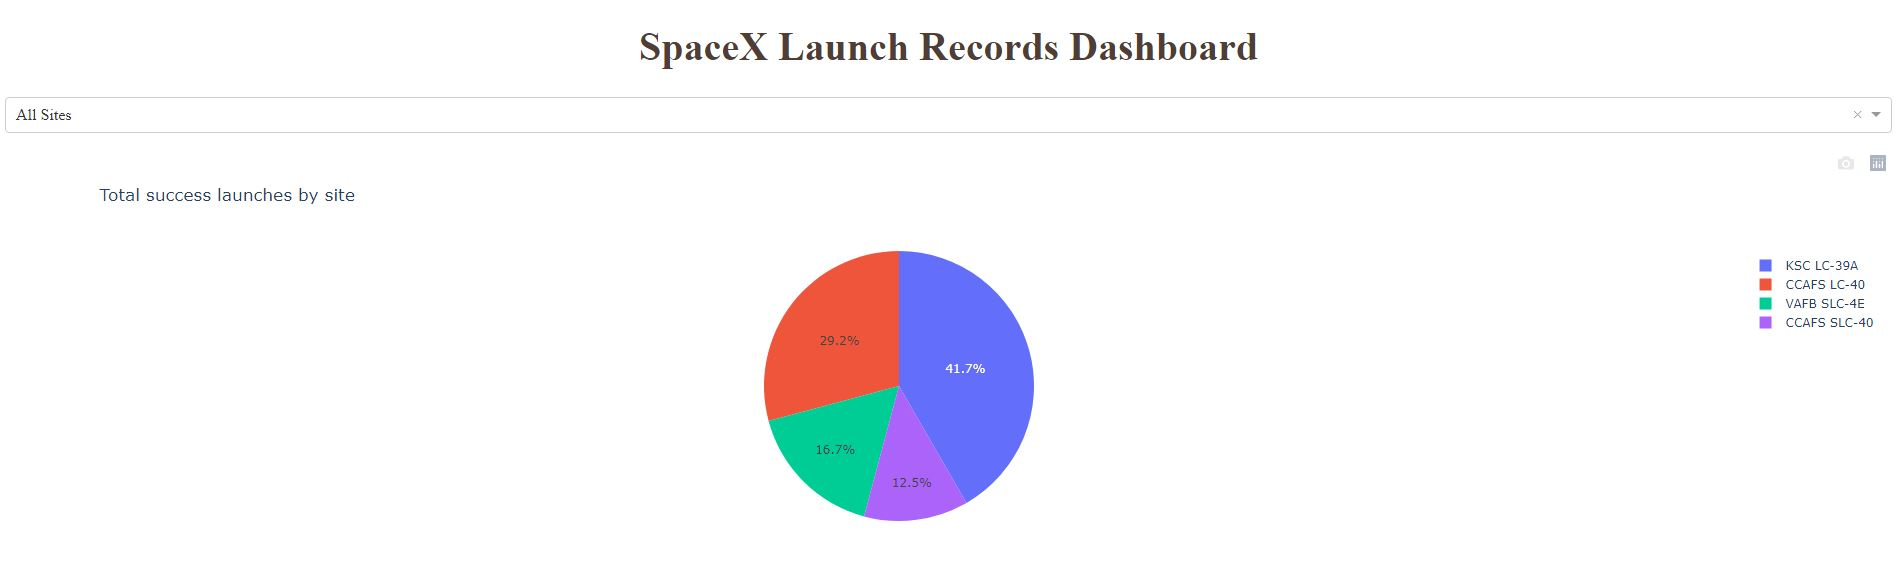

### 2-The drop down with a selected site and a pie chart showing the success rate of the latter:
https://drive.google.com/file/d/1Ta4tA7MvXhd6uInmJmUqmsSTuYSnv52y/view?usp=sharing

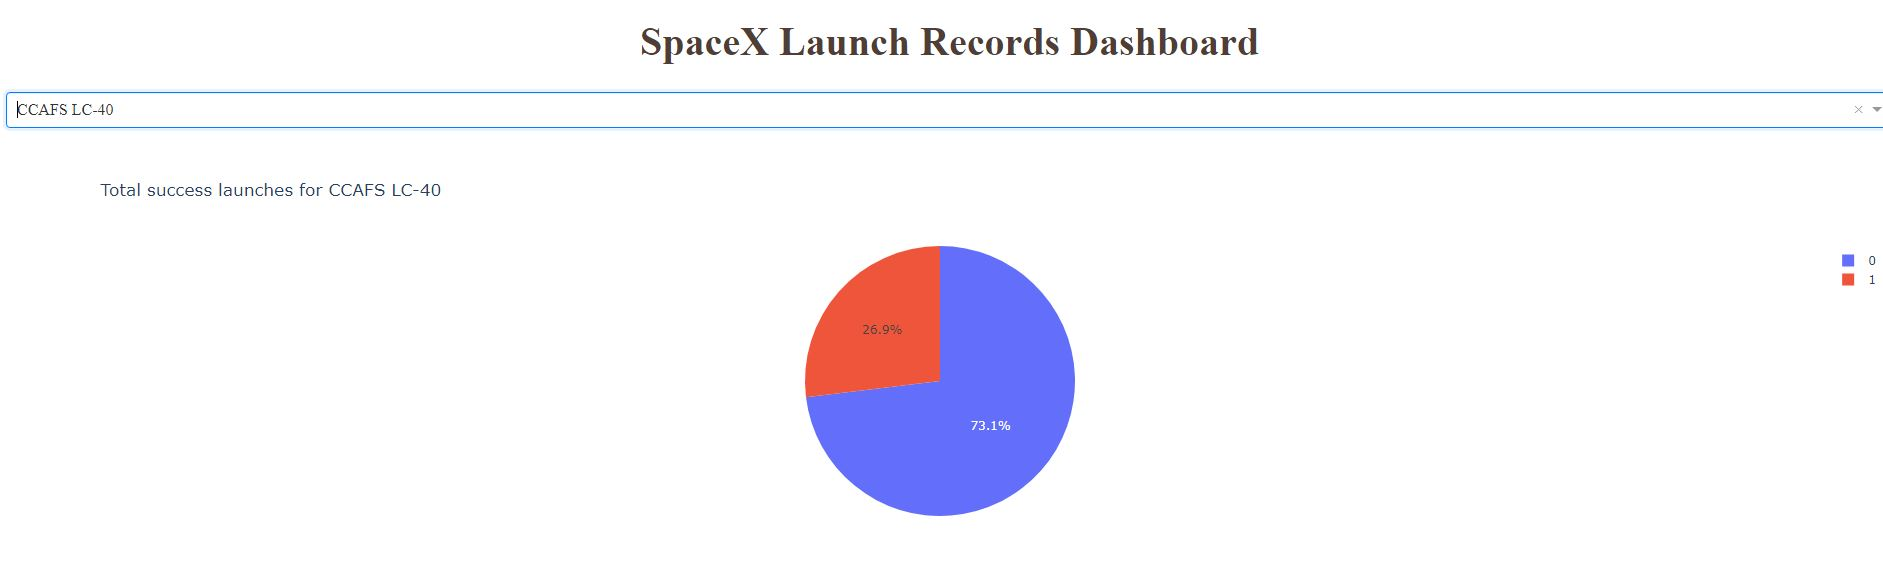

### 3- The range slider selecting all the payload range with the scateer plot showing the launch result upon booster version categories:
https://drive.google.com/file/d/1YHnQ1cCvkpk17g_v1-wkuZClFmM-0oP4/view?usp=sharing

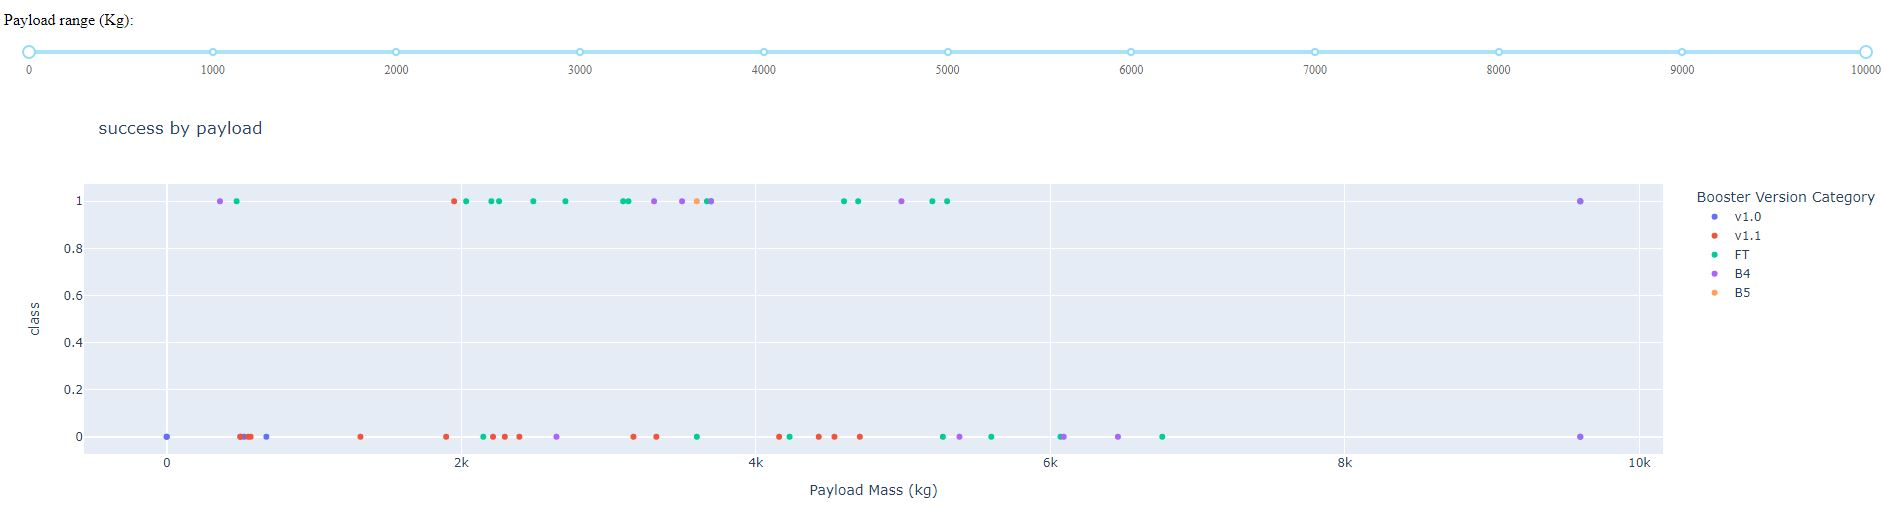

### 4- The range slider selecting the light payload range with the scateer plot showing the launch result upon booster version categories:
https://drive.google.com/file/d/1GO47HCtNCNVj_v5Wvzs5iIEtNdtvcgoS/view?usp=sharing

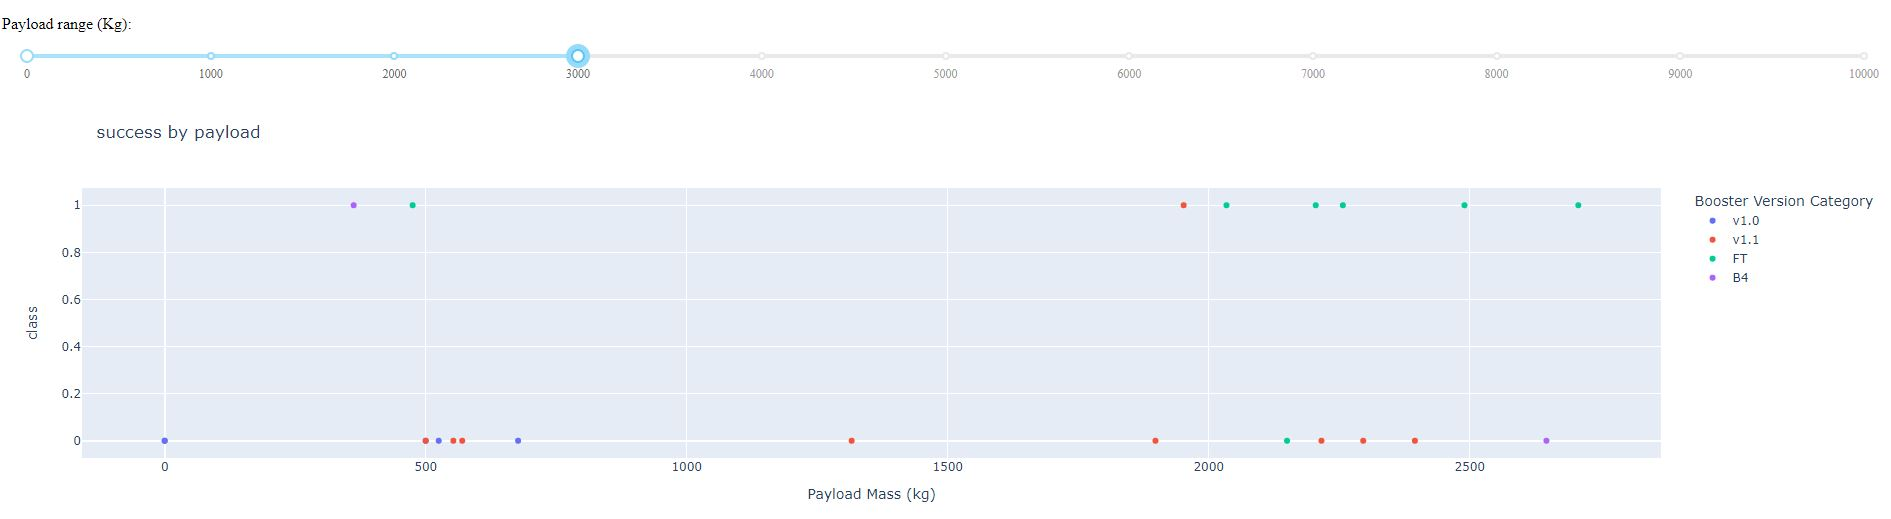

### 5- The range slider selecting the heavy payload range with the scateer plot showing the launch result upon booster version categories:
https://drive.google.com/file/d/1hLmhraA1JNfwfs2P4x76O-CyxBC0eB0w/view?usp=sharing

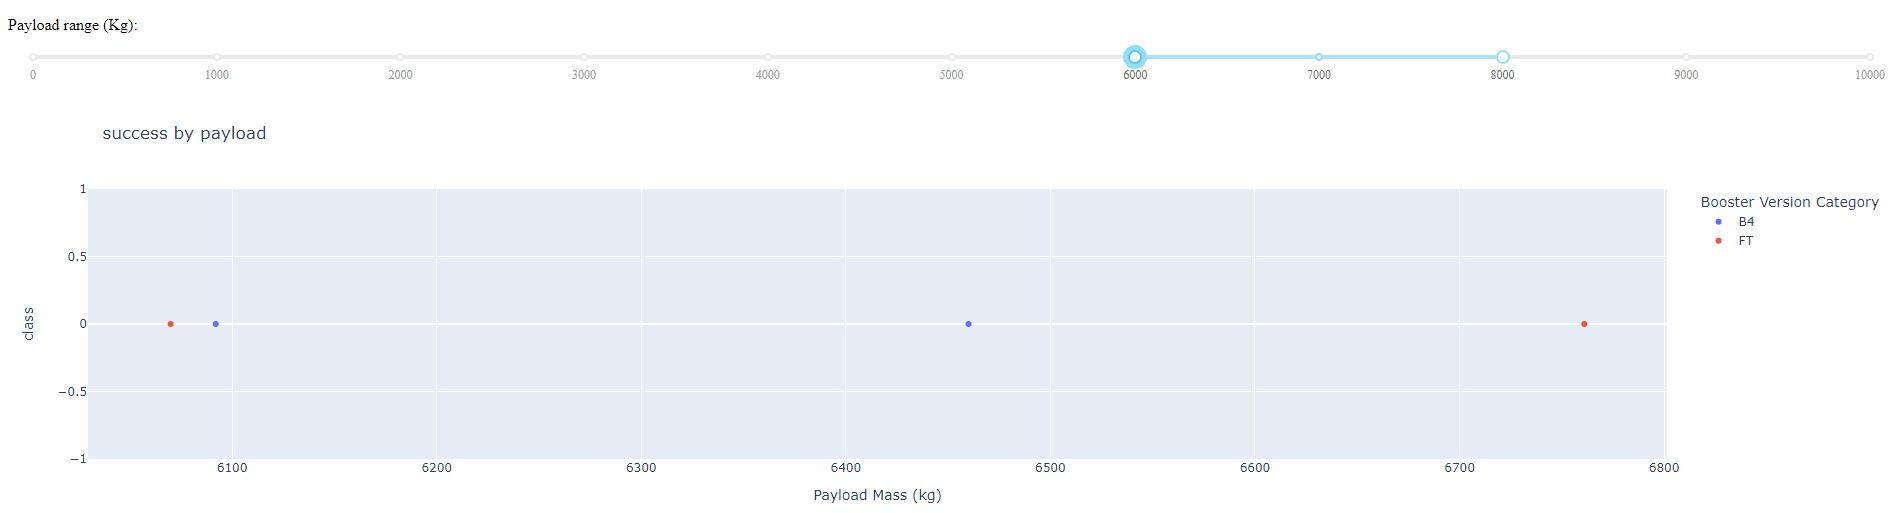